# Census Income Prediction

## Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

In the daset Income is the target variable which has two classes so it termed to be a Classification problem. Here the prediction task is to determine whether a person makes over $50K a year.

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset:

In [2]:
# Reading the csv file in a dataframe
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset contains the information of 51 state samples of US population.The dataset contains 15 columns including the features and the target variable.
Here,Income column is the label which is less than or greater than 50K depending on the various features like Age, Workclass, Fnlwgt,Education, Education_num,
marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week and Native_country.As *Income* variable has two classes i.e <=50K or >=50, it a a *Classification Problem* Statement and we need to redict that whether hte person's income is over 50K or not.

In [3]:
# Displaying top 20 records of this dataset
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# Displaying bottom 20 records of this dataset
df.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


By observing the records, we came across some corrupted data which are filled with '?', which needs to get filled or drop.

# Exploratory Data Analysis(EDA)

In [5]:
#Checking the dimensions of the dataframe
df.shape

(32560, 15)

The dataframe contains 32560 rows and 15 columns.

In [6]:
# For getting the overview summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This provides the information about the dataset including the range index, column type, no null values and memory usage.

In [7]:
# Checking the types of the dataset
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

###### Categorical Columns - 
* Workclass
* Education
* Marital_status
* Occupation
* Relationship
* Race
* Sex
* Native_country
* Income

###### Numeric Columns -
* Age
* Fnlwgt
* Education_num
* Capital_gain
* Capital_loss
* Hours_per_week

So, out of 15 columns, 6 are numeric data variables and 9 are categorical data variables.And we need to tranform these categorical data variables to numeric format for further preoceedings.

In [8]:
# Checking the unique values in each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

These are the number of unique values present in each column.

### Checking for missing data

In [9]:
# Checking null values in the dataset.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### Visualizing missing data using heatmap

<AxesSubplot:>

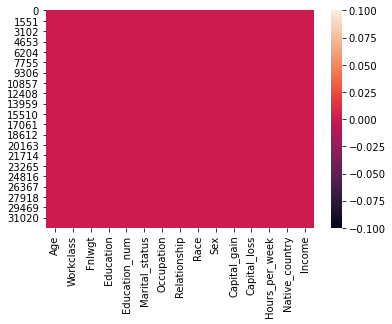

In [10]:
# Null values visulaization using heatmap
sns.heatmap(df.isnull())

We can get a clear visualization of no null data.

In [11]:
# Checking the columns of the dataset
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

#### Value Count on each column

In [12]:
# Checking the value_counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

Using value_count method, we fount the list of values present in each column.
Here we can see the columns having '?' are 'Workclass','Occupation','Native_country' and they all are categorical variables.
So, we can fill them with "Most Frequently occuring values" of the respective columns i.e mode values.

In [13]:
df['Workclass'] = df.Workclass.str.replace('?','Private')
df['Occupation'] = df.Occupation.str.replace('?','Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?','United-States')

#### Rechecking for '?' values

In [14]:
for i in df[['Workclass','Occupation','Native_country']]:
    print(df[i].value_counts())
    print("\n")

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England

Now we can see there is no '?' sign. It means it got filled.

Also we can notice the columns capital gain and capital loss are having majorly '0s',which will impact the model prediction. So lets drop these columns

In [15]:
# Dropping the columns having more no. of '0s'
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [16]:
# Checking the dataframe
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K


In [17]:
# Checking the list of values of Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

These are the two unique values in the target variable ehich are <=50K and >=50K.
We can state that the class is imbalanced and we need to balance the data using SMOTE before model building.

In [18]:
# Checking whether the dataset contain any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


It means there is no space in the dataset.

# Description of Dataset

In [19]:
# Statistical summary of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect as there is no negative/invalid values present.
From the above description we can observe the following things:
* The counts of the columns are same which means there is no missing values presentin any column.
* The mean is greater than the median(50%)in some columns which means they are skewed to the right.
* The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.
* There is a huge difference in 75% amd max it shows that huge outliers are present in the columns.
* In summarizing the data we can observe that the dataset contains the person's age between 17 years to 90 years.

### Separating Categorical and numerical columns

In [20]:
# checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


These are the categorical columns present in the dataset.

In [21]:
# checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


These are the columns having numerical data.

# Data Visualization

## Univariate Analysis:

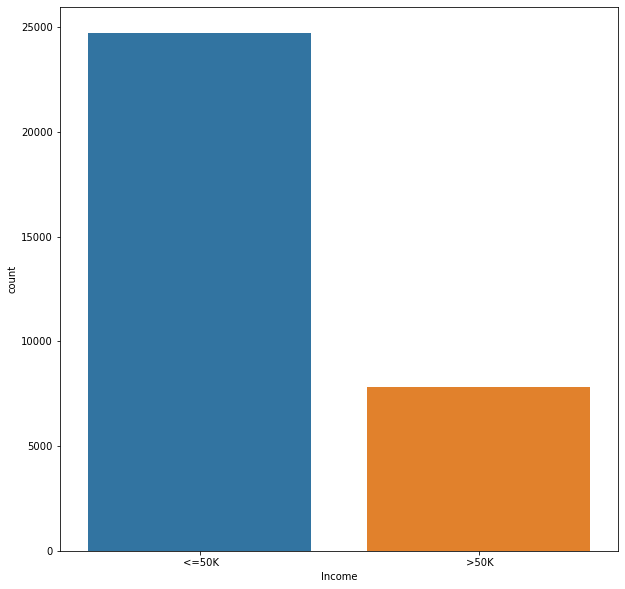

In [22]:
# Visualizing whether the income is above 50K or not.
plt.figure(figsize=(10,10))
sns.countplot(df['Income'])
plt.show()

Most of the people have the income less than or equal to 50K. We can also observr the class is imbalance and hence needs to balance it before model building.

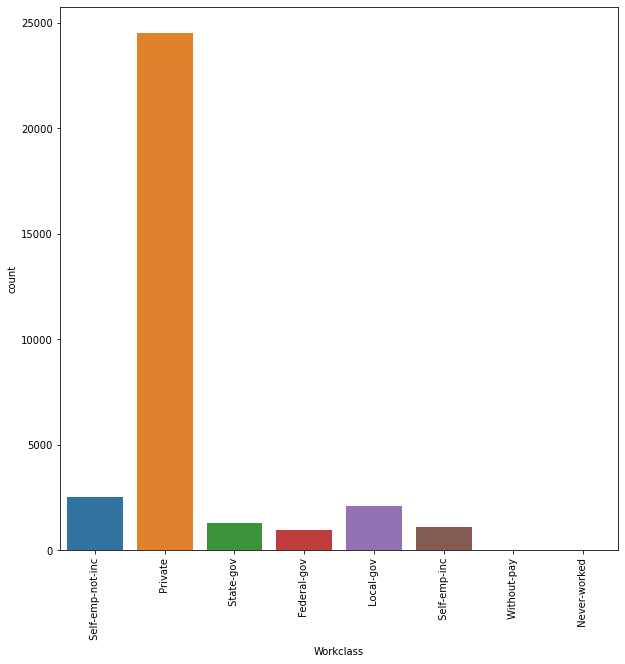

In [23]:
# Visualizing the count of Workclass of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

We can see the count of Private workclass is high compare to others. This means the people working in private sectors are more than the people working in other sectors.

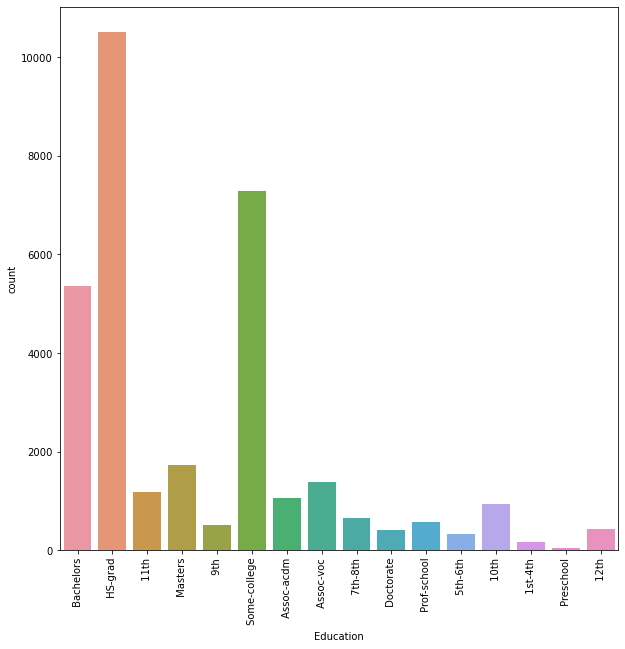

In [24]:
# Visualizing the count of Education of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

The count of HS-grad is high than others and the count is more than 10K.

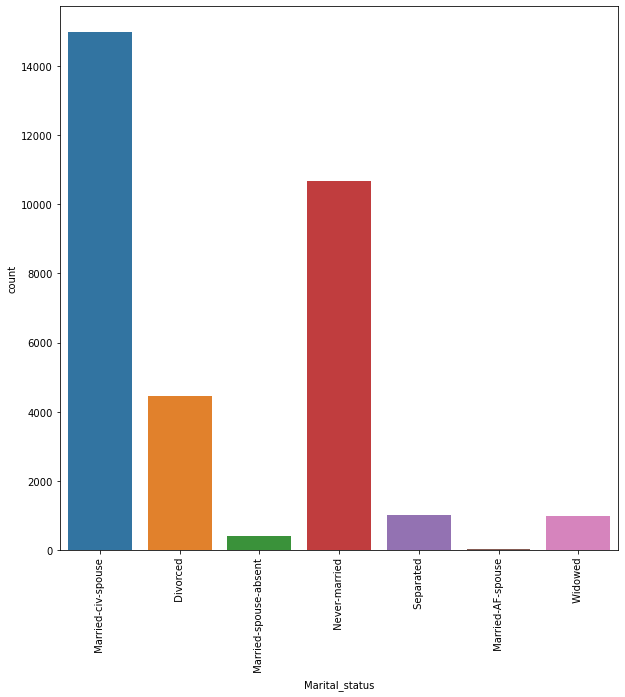

In [25]:
# Visualizing the count of Marital_status of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

The people who got married have high counts followed by the singles or nevermarried.

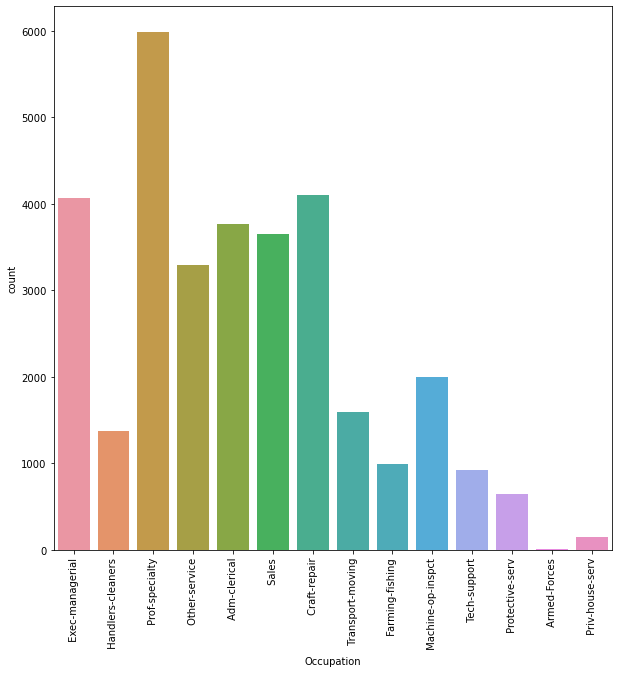

In [26]:
# Visualizing the count of Occupation of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

The people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.

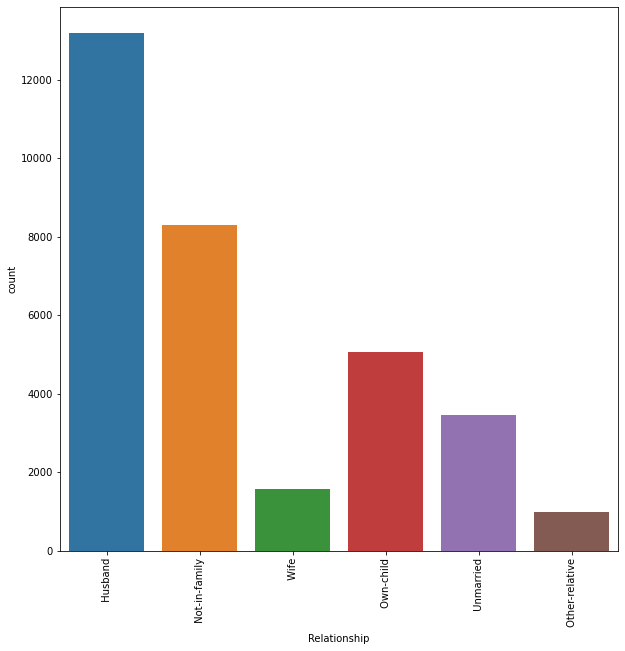

In [27]:
# Visualizing the count of Relationship of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show()

The count is high for the Husband Category which has around 15K of count and other relative has very least count.

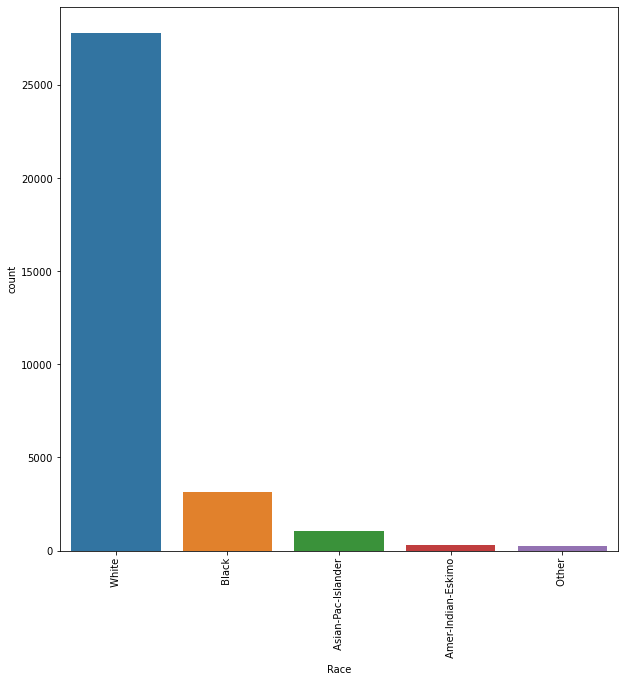

In [28]:
# Visualizing the count of Race of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show()

White Family groups have high vount of around 30K whereas other race have least count.

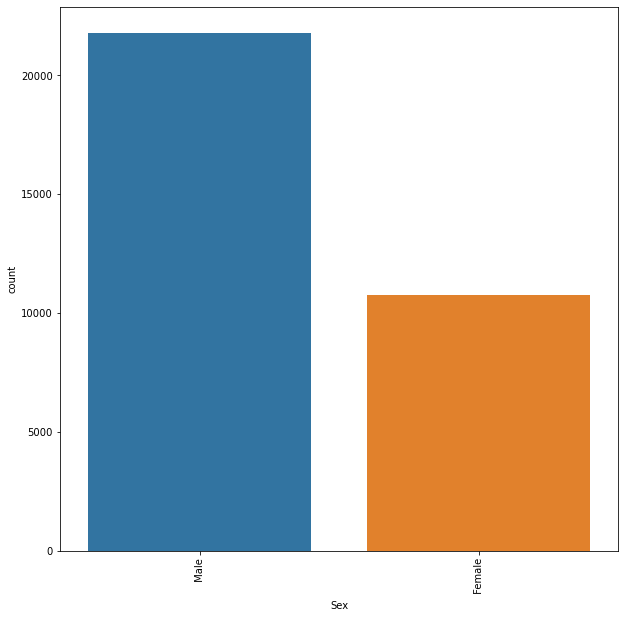

In [29]:
# Visualizing the count of Sex of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show()

The count of Male is high rather than the count of females.

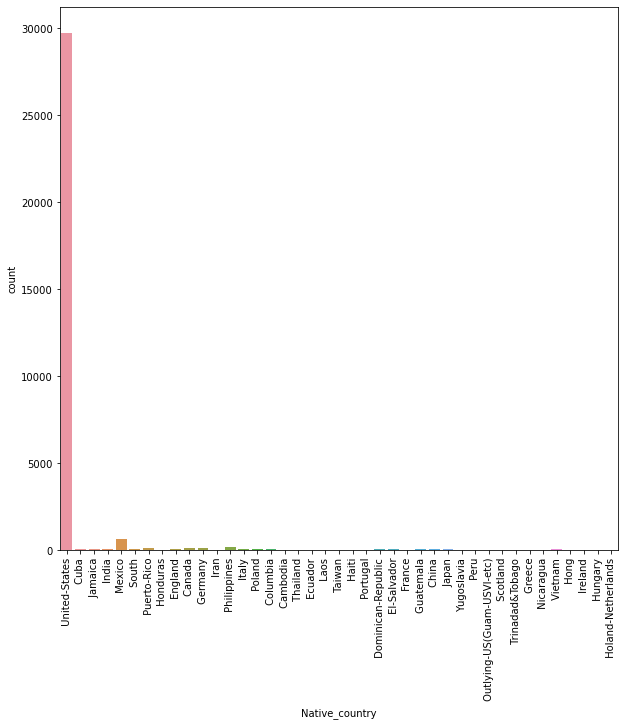

In [30]:
# Visualizing the count of Native_country of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The United States Country has the highest coutn of around 29K and other countries have very less counts.

# Distribution Of Data(Skewness Visualization)

#### Plotting Numerical Columns

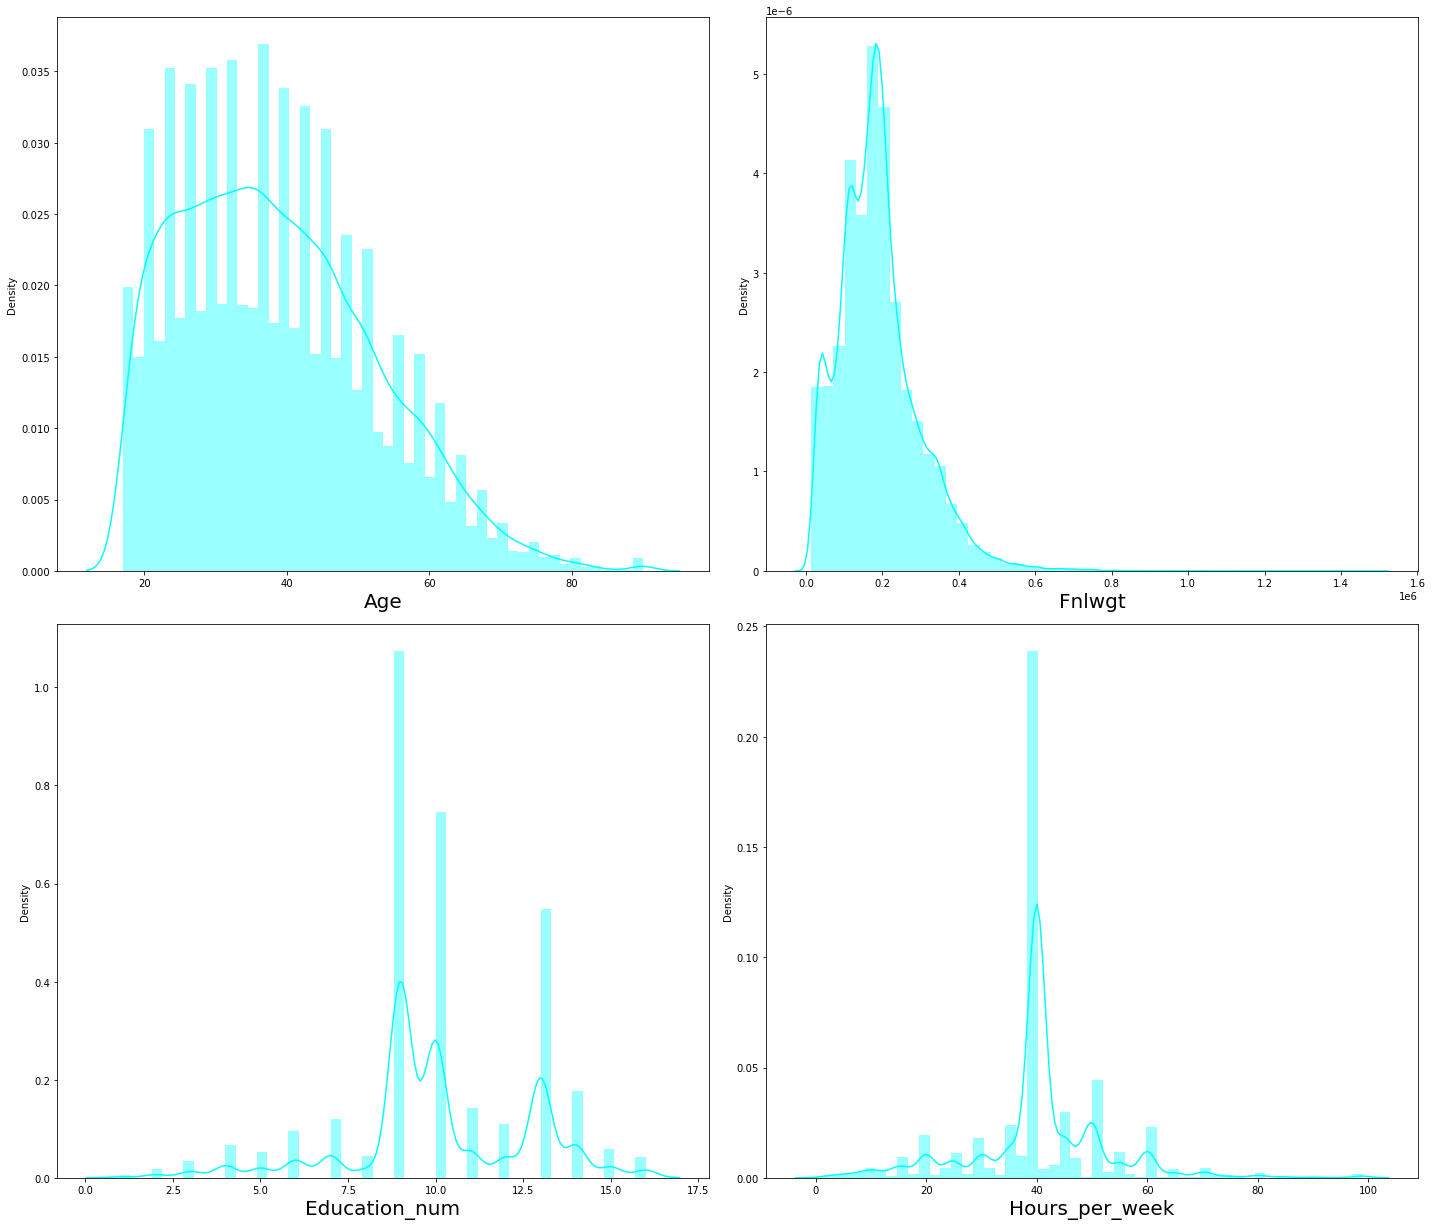

In [31]:
# Checking the distribution of data in each numric column

plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for col in numerical_col:
    if plotnumber<6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()




* From the above distribution plot it can be inferred that Age column seems to be normal but the mean is more than the median so it is rightly skewed.
* The data is not normal in the above columns and the column final_weight has right skewness.
* The data in the column Education_num and Hours_per_week are not normal but they have skewness.

## Bivariate Analysis

<Figure size 720x720 with 0 Axes>

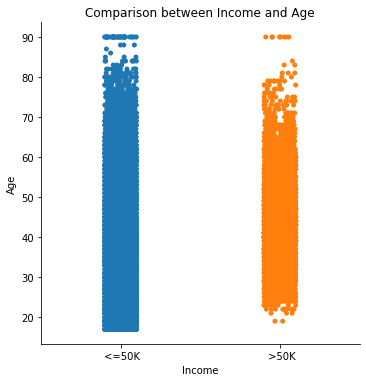

In [32]:
# Visualizing the age of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Age',data=df,kind='strip')
plt.title('Comparison between Income and Age')
plt.show()

We can say that the person below age of 25 having income less than or equal to 50K.

<Figure size 720x720 with 0 Axes>

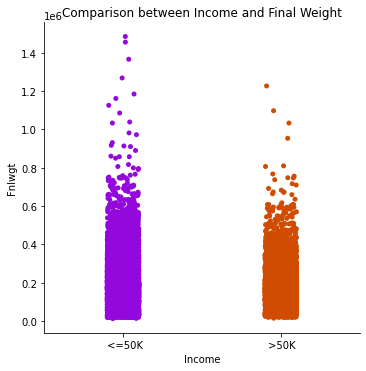

In [33]:
# Visualizing the Final Weight of the person who have more income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Fnlwgt',data=df,kind='strip',palette="gnuplot")
plt.title('Comparison between Income and Final Weight')
plt.show()

There is no significant relation between final weight and Income.

<Figure size 720x720 with 0 Axes>

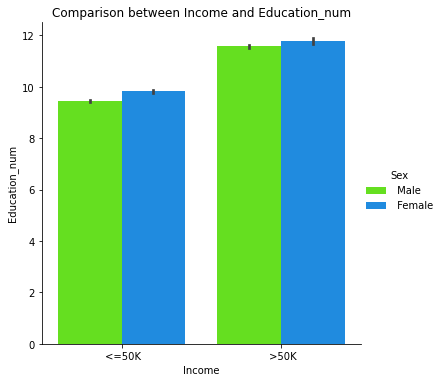

In [34]:
# Visualizing the number of Education with income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Education_num',data=df,kind='bar',hue="Sex",palette="gist_rainbow")
plt.title('Comparison between Income and Education_num')
plt.show()

The income is more than 50K for the people having high education number. Here both gender have the income more than 50K

<Figure size 720x720 with 0 Axes>

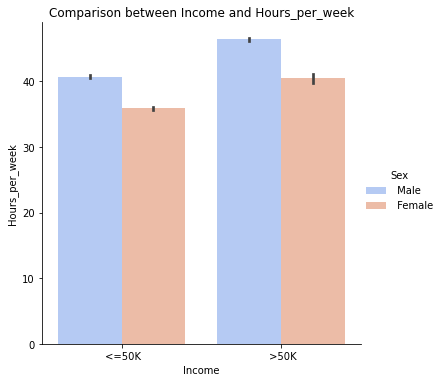

In [35]:
# Visualizing the number of Hours per week with income
plt.figure(figsize=(10,10))
sns.catplot(x='Income',y='Hours_per_week',data=df,kind='bar',hue='Sex',palette="coolwarm")
plt.title('Comparison between Income and Hours_per_week')
plt.show()

This shows how the income is related to the hours per week. The income is >=50K when the hours is high for both male and female.

<Figure size 720x720 with 0 Axes>

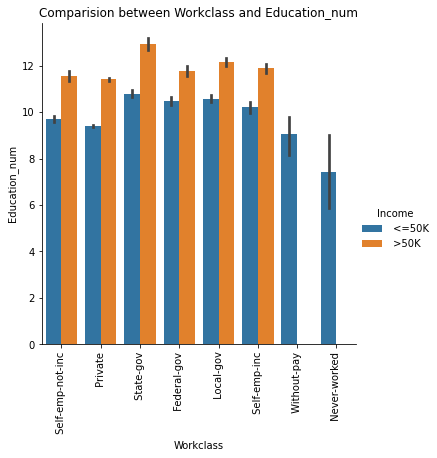

In [36]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,10))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

The people having gov sector jobs(State gov, Federal gov,Local gov) with high education number have the income >50K, also the Private sector position with average education number have second highest income >=50K.

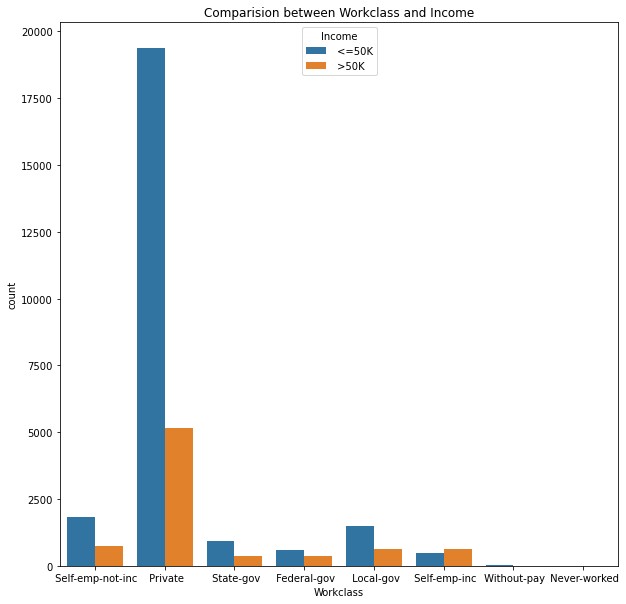

In [37]:
# Visualizing the relation between work class and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Workclass"],hue=df["Income"])
plt.title("Comparision between Workclass and Income")
plt.show()

The people who are working in the private sectors have the income <=50K and very few people in that sector have income >=50K.

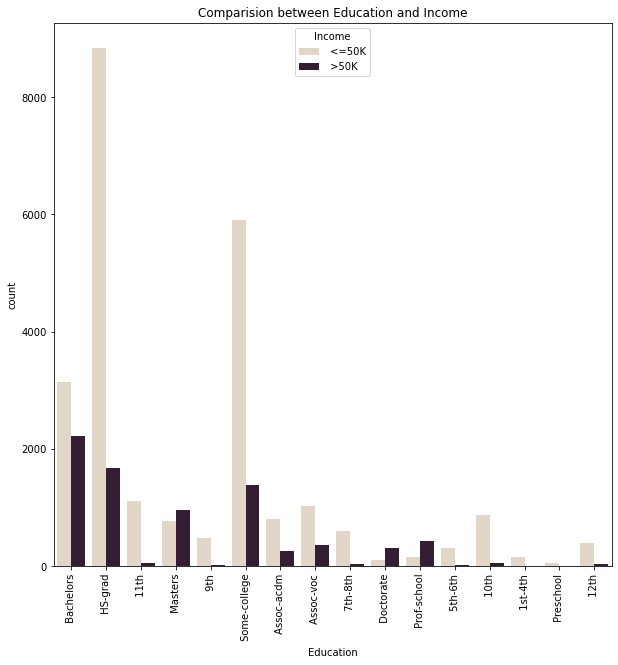

In [38]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Education"],hue=df["Income"],palette='ch:.25')
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

The people who have completed their high school have income <=50K followed by the people who done their Secondary School.And the people who have done their Graduation are earning more i.e 50K.

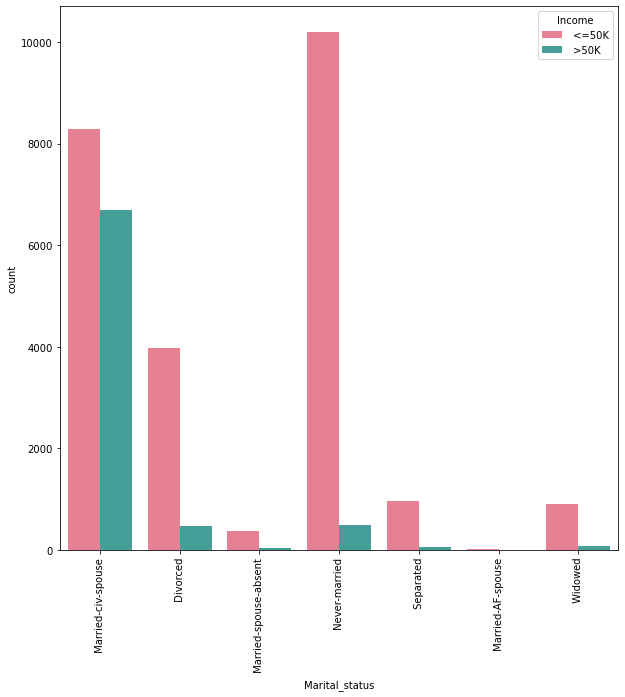

In [39]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'],hue=df['Income'],palette="husl")
plt.xticks(rotation=90)
plt.show()

The people who are married are having income >=50K. And the people who are never married are majorly earning <=50K.

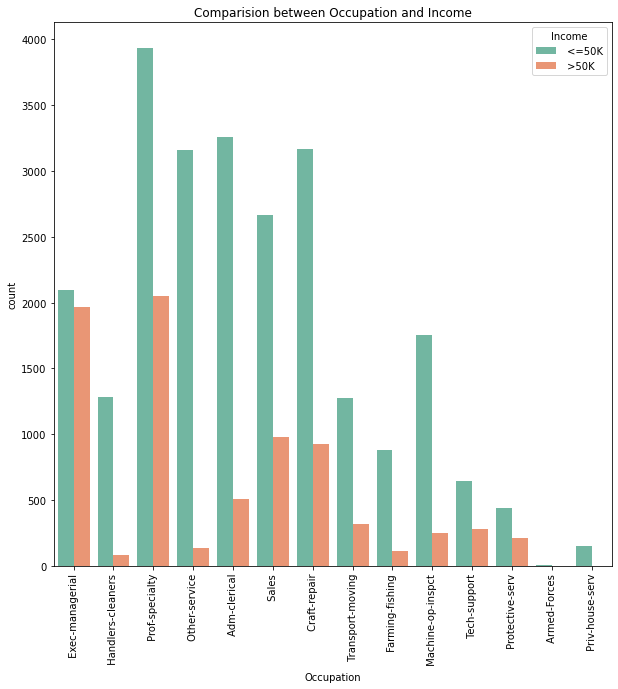

In [40]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette='Set2')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

* Majority people who are in the position Prof-speciality, Other-service, Adm-clerical, Sales and Craft repair have the income more than 50K.
* Very few people who are in the position Handlers-clearners, Farming fishing  have income less than 50K.

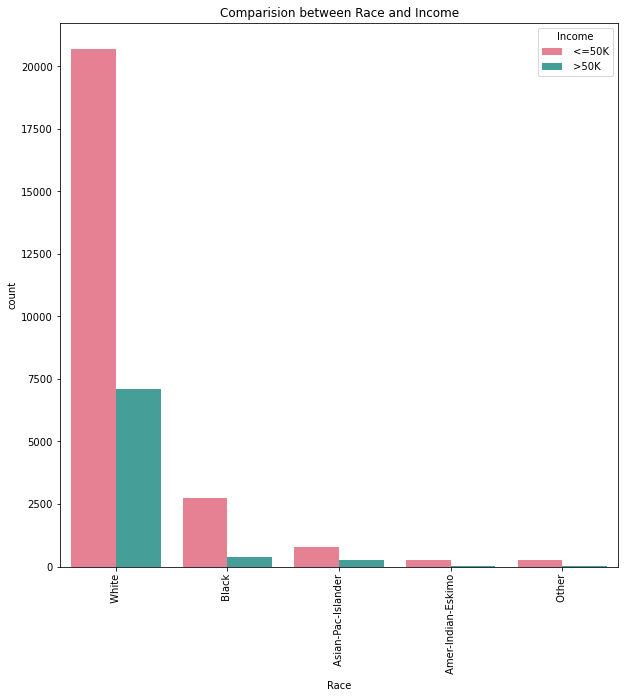

In [41]:
# Visualizing the relation between Race and Income of the people
plt.figure(figsize=(10,10))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="husl")
plt.title("Comparision between Race and Income")
plt.xticks(rotation=90)
plt.show()

The White family groups have high income <50K compare to other racial groups.

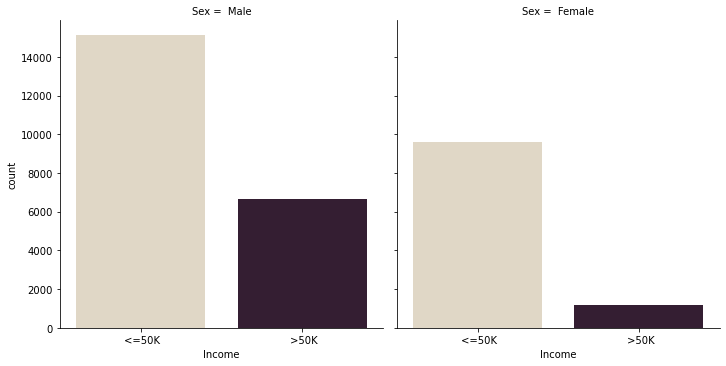

In [42]:
# Visualizing the relation between Income and Sex groups of the people
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="ch:.28")
plt.show()

Majority of males are having the income more than 50K.

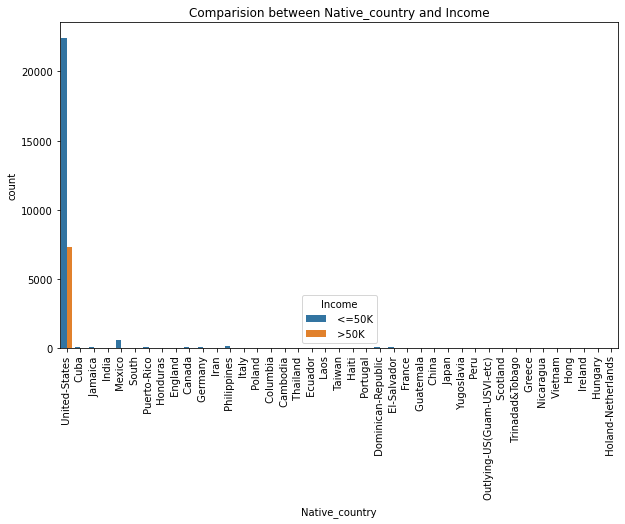

In [43]:
# Visualizing the relation between Native country and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"],hue=df["Income"] )
plt.title("Comparision between Native_country and Income")
plt.xticks(rotation=90)
plt.show()

The people from United states are having high income rather than other countries.

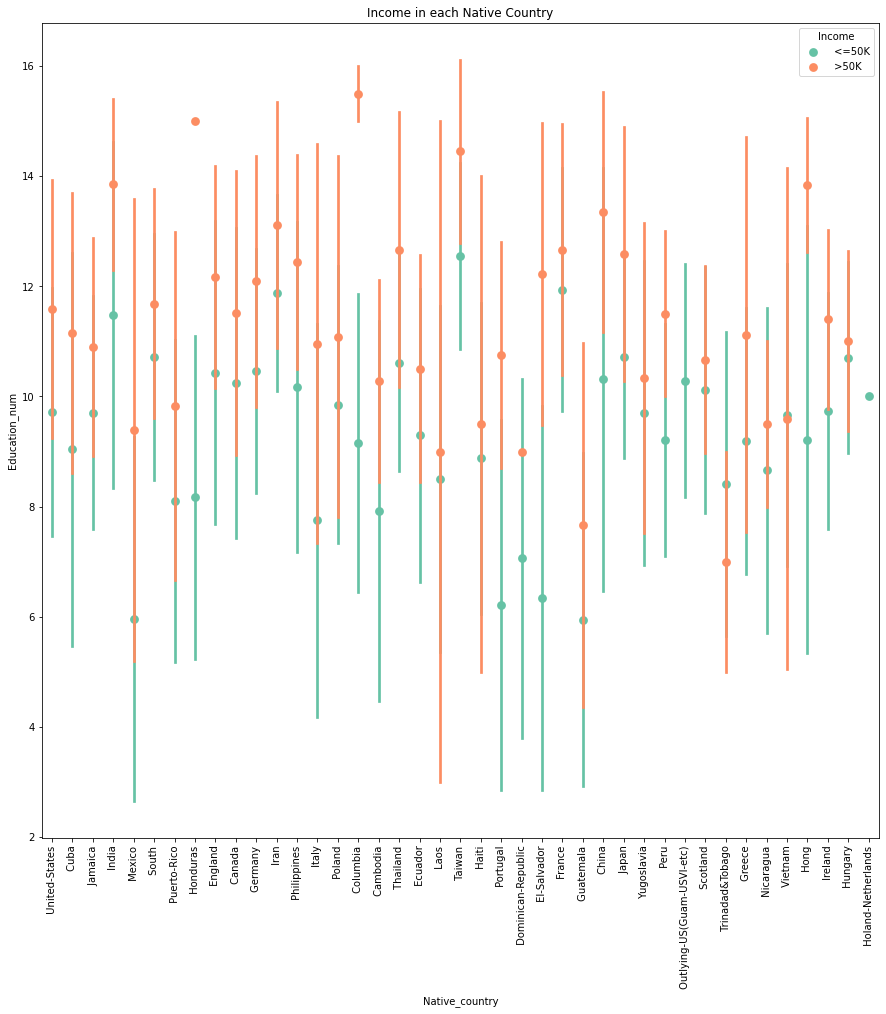

In [44]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


The countries having high education numbers have high incoke that is more than 50K.

## Multivariate Analysis

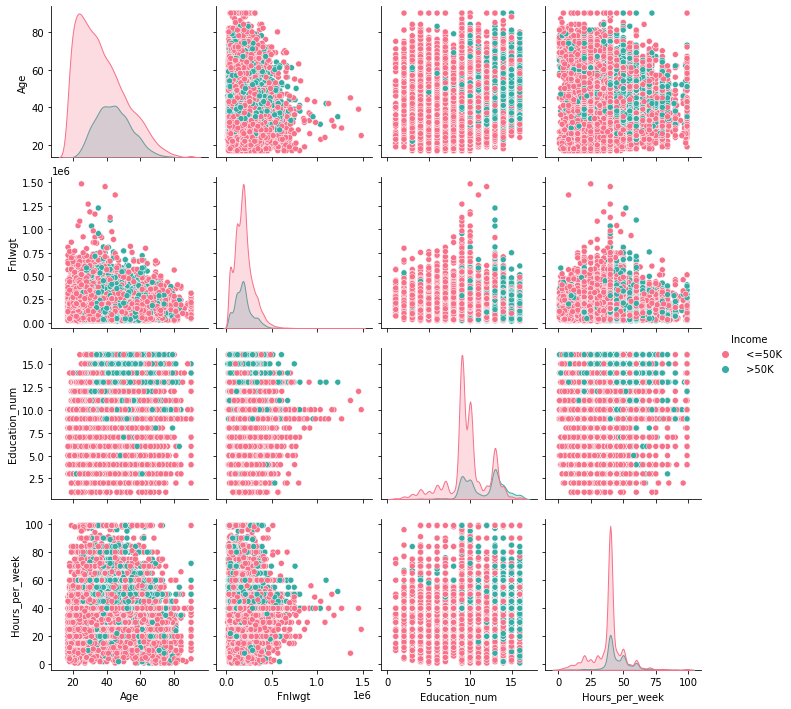

In [45]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

This gives the pairwise relation between the columns which is plotted on the basis of target variable "Income".
We can see, most of the features are highly correlated with each other.
Some of the featurs have outliers and skewness which needs to remove before model building.

# Outliers

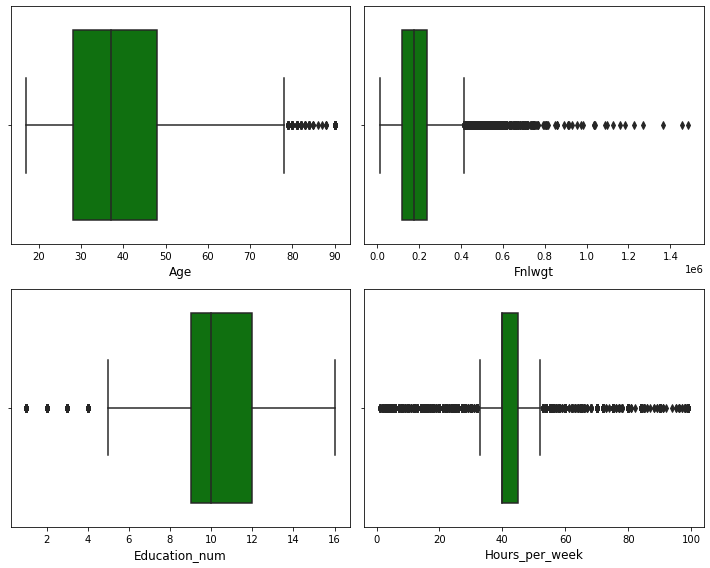

In [46]:
# Visualizing the outliers present in the numerical columns

plt.figure(figsize=(10,8),facecolor="white")
plotnumber=1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can see that all columns have outliers present.

# Removing Outliers

### Zscore method

In [47]:
# Removing outliers using zscore
from scipy.stats import zscore
col = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]
z = np.abs(zscore(col))
z

array([[0.83709708, 1.0087417 , 1.13477863, 2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 0.03542999]])

In [48]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


This is the new dataframe after removing the outliers.We have removed the outliers whose zscore is less than 3.

In [49]:
# Checking the dimenions of both dataframes
print(df.shape)
print(new_df.shape)

(32560, 13)
(31461, 13)


#### Data loss percent

In [50]:
loss = (32560-31461)/32560*100
loss

3.3753071253071254

Here we are losing only 3% data. Lets check with IQR technique.

### IQR

In [51]:
# Removing outliers using IQR
Q1 = col.quantile(0.25)

Q3 = col.quantile(0.75)

#IQR
IQR = Q3-Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [52]:
print(df.shape)
print(df1.shape)

(32560, 13)
(21950, 13)


In [53]:
loss = (32560-21950)/32560*100
loss

32.58599508599509

Using IQR methos, data loss is 32%. As it is more than 10%, we will consider Zscore method

# Removing Skewness

In [54]:
new_df.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

As we can see there is skewness in Fnlwgt column. Removing it using cube root method.

In [55]:
# Removing skewness using cube root method
new_df["Fnlwgt"] = np.cbrt(df['Fnlwgt'])
new_df.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Now the skewness has been removed.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

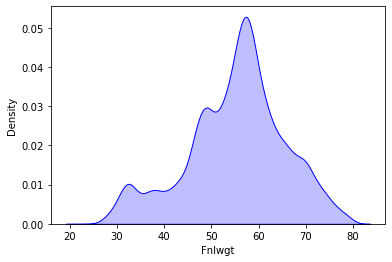

In [56]:
# Visualizing the data distribution after removing skewness
sns.distplot(new_df["Fnlwgt"],color="b",kde_kws={"shade": True},hist=False)

And we can see the data is normalized.

## Encoding the categorical columns

In [57]:
categorical_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [58]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,3,6,2,12,5,4,0,38,0
32556,3,10,2,6,0,4,1,38,1
32557,3,10,6,0,4,4,0,38,0
32558,3,10,4,0,3,4,1,38,0


This dataframe is having the encoded numerical data now.

# Correlation

In [59]:
# Checking the correlation between featuresa nad target variables
cor = new_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.062328,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021663,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.062328,-0.021663,1.000000,-0.024056,-0.031874,0.026902,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.000447,0.004652,-0.024056,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.031874,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.026902,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001524,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.009060,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.006959,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.023307,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


This gives the correlation between dependent and independent variables. We can visualize this by using heatmap.

<AxesSubplot:>

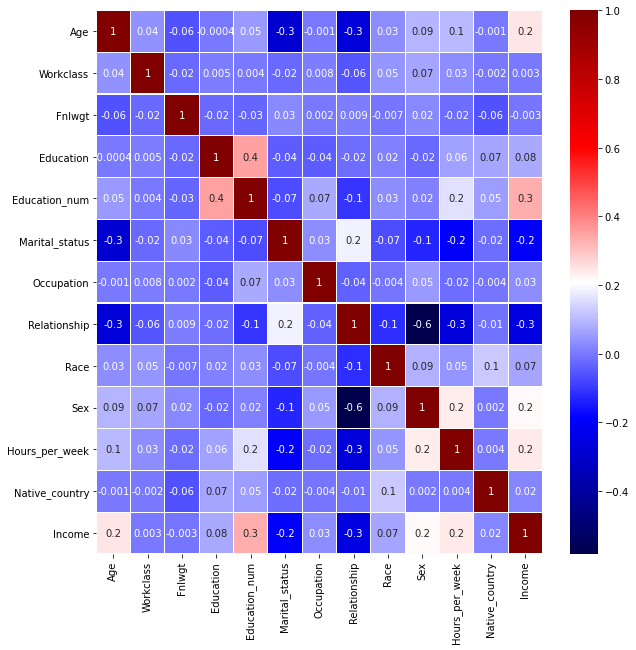

In [60]:
# Visualizing correlation between dependent and independent variables by using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),linewidths=0.1,fmt='.1g',cmap="seismic",annot=True)
#plt.xticks(rotation=90)

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.
* This heatmap contains both positive and negative correlation.
* There is no much correlation between the target and the label.
* The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the label.
* The columns Relationship and Sex are highly correlated with each other also the column Fnlwgt ha very has correlation with the label so we can drop this column.
* There is no multicolinearity issue exits in the data.

In [61]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Education         0.077526
Race              0.072451
Occupation        0.034612
Native_country    0.017698
Workclass         0.003494
Fnlwgt           -0.002780
Marital_status   -0.198475
Relationship     -0.251506
Name: Income, dtype: float64

Here we can easily find the positive and negative correlation between the features and the labels.

# Visualizing the correlation between features and labels using bar plot.

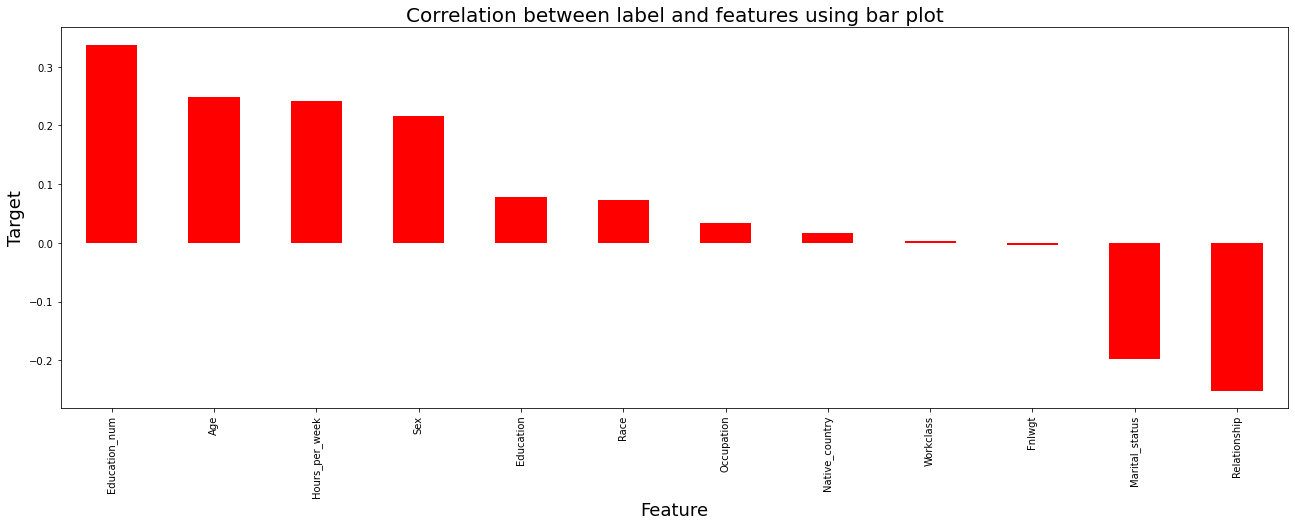

In [62]:
# Visualization using barplot.
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=18)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()

The column fnlwgt and workclass has very less relation with the label, so we can drop these columns if necessary.

# Separating the features and label variables

In [63]:
x = new_df.drop("Income",axis=1)
y = new_df["Income"]

In [64]:
x.shape

(31461, 12)

In [65]:
y.shape

(31461,)

# Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.722723,-1.102052,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,-0.080441,0.464976,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,-0.080441,0.630260,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,-0.080441,1.399791,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,-0.080441,1.023711,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,-0.080441,0.814728,-0.942469,0.750829,-0.403597,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,-0.080441,-0.143169,0.245782,-0.459657,-0.403597,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,-0.080441,-0.170768,0.245782,-0.459657,2.255438,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,-0.080441,0.335900,0.245782,-0.459657,0.925921,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


We have scaled the data using Standard Scalarization method to overcome the issue of data biasness.

In [67]:
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

Here we can notice the class imbalancing issue. Lets use SMOTE to balance the data.

# Oversampling

In [68]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [69]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

The data is balanced now.

In [70]:
# Checking the dataframe after preprocessing and data cleaning.
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,43.675121,8,13,2,3,0,4,1,13,38,0
1,38,3,59.967204,10,9,0,5,1,4,1,40,38,0
2,53,3,61.685627,1,7,2,5,0,2,1,40,38,0
3,28,3,69.686283,8,13,2,9,5,2,0,40,4,0
4,37,3,65.776255,11,14,2,3,5,4,0,40,38,0


So, data cleaning and preprocessing is done. Now we can build the model.

# Modeling

### Finding the best random state

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,random_state=i,test_size=.30)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.8397149245388486 at random_state 39


## Creating train_test_split

In [72]:
x_train,x_test,y_train,y_test = TTS(x,y,random_state=maxRS,test_size=.30)

Splitted the data using best random state.

# Classification Algorithms

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# DecisionTreeClassifier



In [74]:
# checking accuracy_score for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8388764673001677
[[5989 1183]
 [1123 6017]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7172
           1       0.84      0.84      0.84      7140

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.84     14312
weighted avg       0.84      0.84      0.84     14312



The accuracy using DecisionTreeClassifier is 83.88%

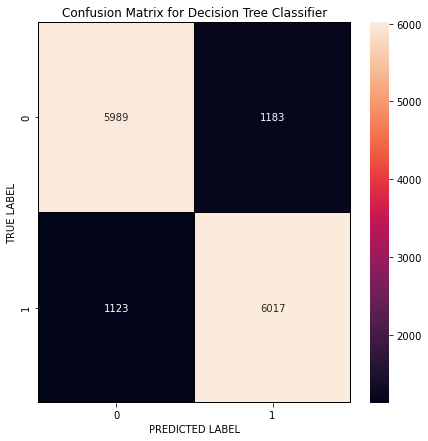

In [75]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

This is the confusion matrix for DecisionTreeClassifier where we can observe trp,fpr,tnr and fnr. And we plotted Predicted values against true values.

# RandomForestClassifier

In [76]:
# checking accuracy_score for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8805198434879821
[[6170 1002]
 [ 708 6432]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7172
           1       0.87      0.90      0.88      7140

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



The accuracy score using RandomForestClassifier is 88.05%.

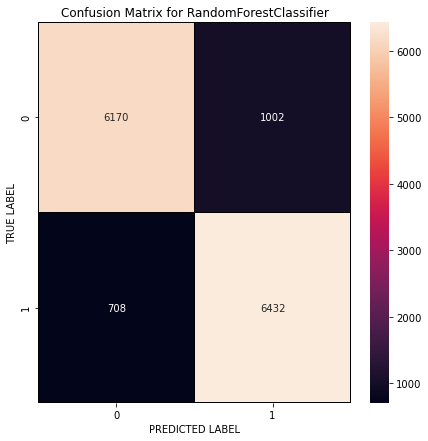

In [77]:
# Lets plot confusion matrix for RFC
cm = confusion_matrix(y_test,predRFC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

# LogisticRegression

In [78]:
# checking accuracy_score for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7524455002794858
[[5220 1952]
 [1591 5549]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      7172
           1       0.74      0.78      0.76      7140

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



The accuracy score using LogisticRegression is 75.24%.

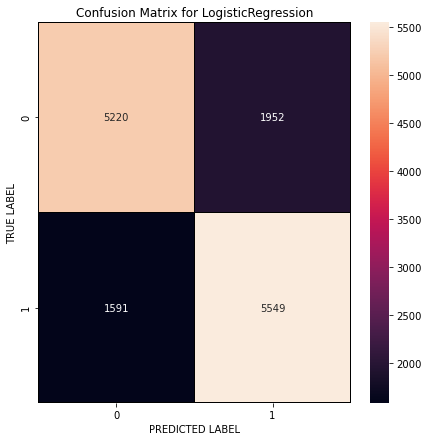

In [79]:
# Lets plot confusion matrix for LogisticRegression
cm = confusion_matrix(y_test,predLR)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for LogisticRegression")
plt.show()

# KNeighborsClassifier

In [80]:
# checking accuracy_score for KNeighborsClassifier
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8436975964225825
[[5485 1687]
 [ 550 6590]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7172
           1       0.80      0.92      0.85      7140

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



The accuracy score using KNeighborsClassifier is 84.36%.

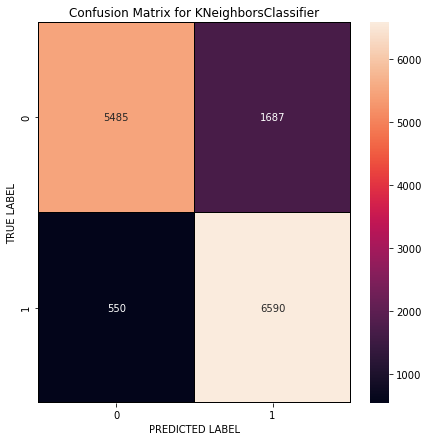

In [81]:
# Lets plot confusion matrix for KNeighborsClassifier
cm = confusion_matrix(y_test,predknn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNeighborsClassifier")
plt.show()

# Gradient Boosting Classifier

In [82]:
# checking accuracy_score for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8535494689770822
[[5781 1391]
 [ 705 6435]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7172
           1       0.82      0.90      0.86      7140

    accuracy                           0.85     14312
   macro avg       0.86      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



The accuracy score using GradientBoostingClassifier is 85.35%.

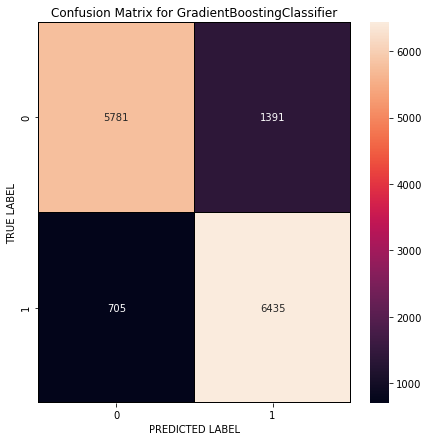

In [83]:
# Lets plot confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for GradientBoostingClassifier")
plt.show()

# XGBClassifier

In [84]:
# checking accuracy_score for XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)
print(accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

[16:21:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8875069871436557
[[6319  853]
 [ 757 6383]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7172
           1       0.88      0.89      0.89      7140

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



The accuracy score using GradientBoostingClassifier is 88.75%.

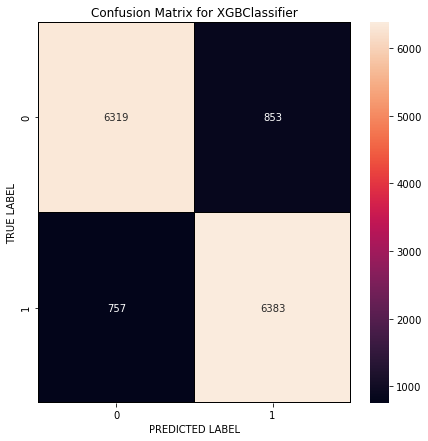

In [85]:
# Lets plot confusion matrix for XGBClassifier
cm = confusion_matrix(y_test,predXGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for XGBClassifier")
plt.show()

# ExtraTrees Classifier

In [86]:
# checking accuracy_score for ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)
predXT = XT.predict(x_test)
print(accuracy_score(y_test,predXT))
print(confusion_matrix(y_test,predXT))
print(classification_report(y_test,predXT))

0.8889044158747904
[[6194  978]
 [ 612 6528]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      7172
           1       0.87      0.91      0.89      7140

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



The accuracy score using ExtraTreesClassifier is 88.89%.

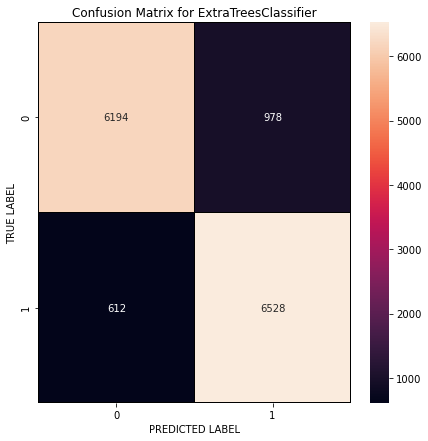

In [87]:
# Lets plot confusion matrix for ExtraTreesClassifier
cm = confusion_matrix(y_test,predXT)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for ExtraTreesClassifier")
plt.show()

# Checking the cross validation score

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8302117936399582


In [90]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8846072321748073


In [91]:
# cv score for Logistic Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.7473275010247669


In [92]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8500821691757299


In [93]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8480285142538426


In [94]:
# cv score for XGBClassifier
print(cross_val_score(XGB,x,y,cv=5).mean())

[16:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [95]:
# cv score for ExtraTreesClassifier
print(cross_val_score(XT,x,y,cv=5).mean())

0.8940814972968761


Above are the cross validation scores for the models used.

The difference between the accuracy score and the CV score of RandomForestClassifier is least i.e 0.41.So, we can conclude that **RandomForestClassifier** as best fitting model.

# Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
# RandomForestClassifier
parameters = {'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             "min_samples_leaf":[2,3,4,5,6]}

In [98]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6]})

In [100]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2}

In [101]:
census = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='auto',min_samples_leaf=2)
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.67467859139184


The accuracy of the best model after tuning is 87.67%.

# Plotting ROC and compare AUC for all the models used

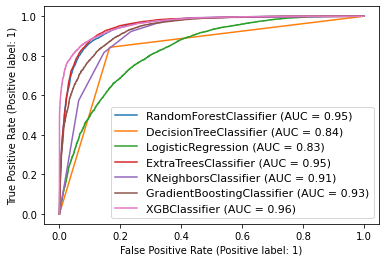

In [103]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_) # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Plotting ROC and Compare AUC for the best model

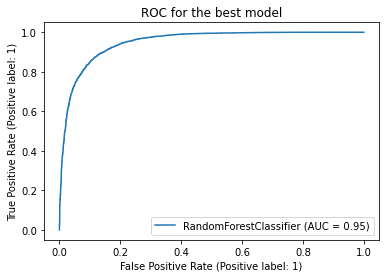

In [104]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

The Auc for the best model is 0.95

# Saving The Model

In [105]:
# Saving the model using .pkl
import joblib
joblib.dump(census,"Census Income Prediction.pkl")

['Census Income Prediction.pkl']

# Predicting the saved model

In [106]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Census Income Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 1, 1])

In [107]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,0,0,0,1,0,1,0,1,0,1,...,1,1,1,1,0,0,0,1,1,1
Original,0,0,0,1,0,1,0,1,0,1,...,1,1,1,1,0,0,0,1,1,1
